In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_dos = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__DoS_driving_HYSonata.csv")
df_free = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Free_driving_HYSonata.csv")
df_fuzzy = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Fuzzy_driving_HYSonata.csv")
df_mal = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Malfunction_driving_HYSonata.csv")
# pd.read_csv('파일명.확장자') # 주로 csv파일, DataFrame형태로 가져옴


In [ ]:
df_dos.head() # 상위 5개 행 출력 괄호안에 몇 개 출력할지 쓰면 됨 안쓰면 5개

,1513923916.265600,2C0,8,14 00 00 00 00 00 00 00,Normal
0,1.513924e+09,002,8,00 00 00 00 00 0A 01 D5,Normal
1,1.513924e+09,153,8,00 00 00 FF 00 FF 00 00,Normal
2,1.513924e+09,130,8,FF 7F 00 FF 12 80 01 3F,Normal
3,1.513924e+09,131,8,E9 7F 00 00 83 7F 01 E5,Normal
4,1.513924e+09,140,8,00 00 00 00 02 20 21 E6,Normal


In [ ]:
df_free.head()

,1513920290.904836,4B1,8,00 00 00 00 00 00 00 00,Normal
0,1.513920e+09,1F1,8,00 00 00 00 00 00 00 00,Normal
1,1.513920e+09,153,8,00 00 00 FF 00 FF 00 00,Normal
2,1.513920e+09,002,8,00 00 00 00 00 02 06 DC,Normal
3,1.513920e+09,130,8,01 80 00 FF 04 80 06 D0,Normal
4,1.513920e+09,131,8,00 80 00 00 87 7F 06 26,Normal


In [ ]:
df_fuzzy.head()

,1513925480.360185,370,8,00 20 00 00 00 00 00 00,Normal
0,1.513925e+09,43F,8,01 45 60 FF 6D 93 08 00,Normal
1,1.513925e+09,440,8,FF 01 04 00 FF 93 08 4F,Normal
2,1.513925e+09,130,8,7A 80 00 FF E4 7F 0B BD,Normal
3,1.513925e+09,131,8,E5 7F 00 00 92 82 0B C2,Normal
4,1.513925e+09,140,8,00 00 00 00 10 28 2B 75,Normal


In [ ]:
df_mal.head()

,1513924357.331261,2B0,5,FE FF 00 07 DB,Normal
0,1.513924e+09,43F,8,01 45 60 FF 61 85 07 00,Normal
1,1.513924e+09,370,8,00 21 00 00 00 00 00 00,Normal
2,1.513924e+09,440,8,FF 01 04 00 FF 85 07 07,Normal
3,1.513924e+09,316,8,05 39 30 10 39 15 03 77,Normal
4,1.513924e+09,18F,8,FE 41 00 00 00 4C 00 00,Normal


In [ ]:
df_dos.columns = ['TimeStamp', 'CAN_ID', 'DLC', 'DataField', 'temp'] # 컬럼의 이름 변경 (개수가 맞아야함)
df_free.columns = ['TimeStamp', 'CAN_ID', 'DLC', 'DataField', 'temp'] 
df_fuzzy.columns = ['TimeStamp', 'CAN_ID', 'DLC', 'DataField', 'temp'] 
df_mal.columns = ['TimeStamp', 'CAN_ID', 'DLC', 'DataField', 'temp'] 

In [ ]:
df_dos = df_dos.drop('temp', axis=1) # df.drop('컬럼명', axis=1) # 해당 컬럼 제거
df_free = df_free.drop('temp', axis=1)
df_fuzzy = df_fuzzy.drop('temp', axis=1)
df_mal = df_mal.drop('temp', axis=1)

## 함수 셋팅

In [ ]:
def soo_df(df): # 내가 원하는 CANID 값을 가지고 있는 행만 추출하는 함수
  soo_columns = ['0A0', '0A1', '18F', '1F1', '2A0', '2B0', '2C0'] # CAN_ID 리스트
  can_id = df['CAN_ID'].isin(soo_columns) # 해당 리스트에 포함되어있는 값을 True로 지정
  df = df.loc[can_id] # True인 행만 추출
  df = df.reset_index()
  df['TimeWindow'] = None
  df.loc[0, 'TimeWindow'] = 0
  df['TimeStack'] = None # 누적
  df.loc[0, 'TimeStack'] = 0

  return df

In [ ]:
from tqdm.auto import tqdm # 진행률 프로세스바 설정
def setTime(df): # TImeStamp 값의 차이를 계산해주는 함수
  windows = []

  for i in tqdm(range(1, df.shape[0])):
      loss = df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp'] # TimeStamp 값
      df.loc[i, 'TimeWindow'] = loss
      df.loc[i, 'TimeStack'] = df.loc[i-1, 'TimeStack'] + loss # TImeStamp 차이 값을 누적하는 TimeStack을 계산해주는 코드

  return df

### 기본 데이터 조회

상위 5개 데이터 조회

In [ ]:
df_dos.head()

,TimeStamp,CAN_ID,DLC,DataField
0,1.513924e+09,002,8,00 00 00 00 00 0A 01 D5
1,1.513924e+09,153,8,00 00 00 FF 00 FF 00 00
2,1.513924e+09,130,8,FF 7F 00 FF 12 80 01 3F
3,1.513924e+09,131,8,E9 7F 00 00 83 7F 01 E5
4,1.513924e+09,140,8,00 00 00 00 02 20 21 E6


기본 정보 조회

In [ ]:
df_dos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928851 entries, 0 to 928850
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TimeStamp  928851 non-null  float64
 1   CAN_ID     928851 non-null  object 
 2   DLC        928851 non-null  int64  
 3   DataField  928851 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.3+ MB


In [ ]:
df_dos = soo_df(df_dos)
df_dos

,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,5,1.513924e+09,2B0,5,E9 FF 00 07 22,0,0
1,11,1.513924e+09,18F,8,FE 49 00 00 00 3C 00 00,None,None
2,13,1.513924e+09,2A0,8,60 00 72 1D 0B 05 E3 00,None,None
3,16,1.513924e+09,2C0,8,14 00 00 00 00 00 00 00,None,None
4,19,1.513924e+09,1F1,8,00 C5 00 00 00 00 00 00,None,None
...,...,...,...,...,...,...,...
164761,928821,1.513924e+09,18F,8,FE 3C 00 00 00 50 00 00,None,None
164762,928824,1.513924e+09,2A0,8,20 00 77 1D 0B 05 E3 00,None,None
164763,928836,1.513924e+09,1F1,8,00 3C 55 50 05 55 50 05,None,None
164764,928847,1.513924e+09,2B0,5,53 FF 02 07 21,None,None


In [ ]:
df_dos = setTime(df_dos)
df_dos.to_csv('/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__DoS_driving_HYSonata_Time.csv')

  0%|          | 0/164765 [00:00<?, ?it/s]

In [ ]:
df_free = soo_df(df_free)
df_free = setTime(df_free)
df_free.to_csv('/content/drive/MyDrive/IVN3_Dataset/IVN_HYSonata_Driving/IVN__Free_driving_HYSonata_Time.csv')

df_free

In [ ]:
df_fuzzy = soo_df(df_fuzzy)
df_fuzzy = setTime(df_fuzzy)
df_fuzzy.to_csv('/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Fuzzy_driving_HYSonata_Time.csv')

  0%|          | 0/190770 [00:00<?, ?it/s]

In [ ]:
df_mal = soo_df(df_mal)
df_mal = setTime(df_mal)
df_mal.to_csv('/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Malfunction_driving_HYSonata_Time.csv')

  0%|          | 0/146101 [00:00<?, ?it/s]

In [ ]:
df_dos_Time = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__DoS_driving_HYSonata_Time.csv")

df_dos_Time

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,5,1.513924e+09,2B0,5,E9 FF 00 07 22,0.000000,0.000000
1,1,11,1.513924e+09,18F,8,FE 49 00 00 00 3C 00 00,0.003490,0.003490
2,2,13,1.513924e+09,2A0,8,60 00 72 1D 0B 05 E3 00,0.000460,0.003950
3,3,16,1.513924e+09,2C0,8,14 00 00 00 00 00 00 00,0.001385,0.005335
4,4,19,1.513924e+09,1F1,8,00 C5 00 00 00 00 00 00,0.003366,0.008701
...,...,...,...,...,...,...,...,...
164761,164761,928821,1.513924e+09,18F,8,FE 3C 00 00 00 50 00 00,0.003043,351.287880
164762,164762,928824,1.513924e+09,2A0,8,20 00 77 1D 0B 05 E3 00,0.000724,351.288604
164763,164763,928836,1.513924e+09,1F1,8,00 3C 55 50 05 55 50 05,0.002966,351.291570
164764,164764,928847,1.513924e+09,2B0,5,53 FF 02 07 21,0.002764,351.294334


In [ ]:
df_dos_Time.head()

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,5,1.513924e+09,2B0,5,E9 FF 00 07 22,0.000000,0.000000
1,1,11,1.513924e+09,18F,8,FE 49 00 00 00 3C 00 00,0.003490,0.003490
2,2,13,1.513924e+09,2A0,8,60 00 72 1D 0B 05 E3 00,0.000460,0.003950
3,3,16,1.513924e+09,2C0,8,14 00 00 00 00 00 00 00,0.001385,0.005335
4,4,19,1.513924e+09,1F1,8,00 C5 00 00 00 00 00 00,0.003366,0.008701


In [ ]:
df_free_Time = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Free_driving_HYSonata_Time.csv")

df_free_Time

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,0,1.513920e+09,1F1,8,00 00 00 00 00 00 00 00,0.000000,0.000000
1,1,6,1.513920e+09,2B0,5,17 00 00 07 54,0.001881,0.001881
2,2,9,1.513920e+09,18F,8,FE 4B 00 00 00 3C 00 00,0.004031,0.005912
3,3,11,1.513920e+09,2A0,8,60 00 72 1D 09 05 E3 00,0.000467,0.006379
4,4,17,1.513920e+09,2C0,8,14 00 00 00 00 00 00 00,0.002158,0.008537
...,...,...,...,...,...,...,...,...
219398,219398,911095,1.513921e+09,2B0,5,07 00 00 07 88,0.007295,466.632639
219399,219399,911097,1.513921e+09,18F,8,FE 4E 00 00 00 3C 00 00,0.000832,466.633471
219400,219400,911099,1.513921e+09,2A0,8,20 00 77 1D 09 05 E3 00,0.000470,466.633941
219401,219401,911103,1.513921e+09,1F1,8,00 C8 00 00 00 00 00 00,0.000978,466.634919


In [ ]:
df_free_Time.head()

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,0,1.513920e+09,1F1,8,00 00 00 00 00 00 00 00,0.000000,0.000000
1,1,6,1.513920e+09,2B0,5,17 00 00 07 54,0.001881,0.001881
2,2,9,1.513920e+09,18F,8,FE 4B 00 00 00 3C 00 00,0.004031,0.005912
3,3,11,1.513920e+09,2A0,8,60 00 72 1D 09 05 E3 00,0.000467,0.006379
4,4,17,1.513920e+09,2C0,8,14 00 00 00 00 00 00 00,0.002158,0.008537


In [ ]:
df_fuzzy_Time = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Fuzzy_driving_HYSonata_Time.csv")

df_fuzzy_Time

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,5,1.513925e+09,18F,8,FE 59 00 00 00 4D 00 00,0.000000,0.000000
1,1,7,1.513925e+09,2A0,8,60 00 82 1C 0C 05 E3 00,0.000474,0.000474
2,2,11,1.513925e+09,2B0,5,91 00 02 07 58,0.000890,0.001364
3,3,13,1.513925e+09,2C0,8,14 00 00 00 00 00 00 00,0.002242,0.003606
4,4,20,1.513925e+09,1F1,8,00 BB 25 50 02 24 40 02,0.005677,0.009283
...,...,...,...,...,...,...,...,...
190766,190766,801044,1.513926e+09,2A0,8,64 00 80 1C 0C 05 E3 00,0.000480,317.624400
190767,190767,801052,1.513926e+09,2B0,5,F2 0A 2D 07 C3,0.005345,317.629745
190768,190768,801055,1.513926e+09,2C0,8,14 00 00 00 00 00 00 00,0.003031,317.632776
190769,190769,801057,1.513926e+09,1F1,8,08 E3 30 A0 03 2D 70 03,0.000469,317.633245


In [ ]:
df_fuzzy_Time.head()

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,5,1.513925e+09,18F,8,FE 59 00 00 00 4D 00 00,0.000000,0.000000
1,1,7,1.513925e+09,2A0,8,60 00 82 1C 0C 05 E3 00,0.000474,0.000474
2,2,11,1.513925e+09,2B0,5,91 00 02 07 58,0.000890,0.001364
3,3,13,1.513925e+09,2C0,8,14 00 00 00 00 00 00 00,0.002242,0.003606
4,4,20,1.513925e+09,1F1,8,00 BB 25 50 02 24 40 02,0.005677,0.009283


In [ ]:
df_mal_Time = pd.read_csv("/content/drive/MyDrive/IVN_Dataset/IVN_HYSonata_Driving/IVN__Malfunction_driving_HYSonata_Time.csv")

df_mal_Time

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,4,1.513924e+09,18F,8,FE 41 00 00 00 4C 00 00,0.000000,0.000000
1,1,6,1.513924e+09,2A0,8,40 00 7B 1D 0B 05 E3 00,0.000467,0.000467
2,2,10,1.513924e+09,1F1,8,00 1B 1F F0 01 1F F0 01,0.000956,0.001423
3,3,13,1.513924e+09,2C0,8,14 00 00 00 00 00 00 00,0.000741,0.002164
4,4,20,1.513924e+09,2B0,5,FE FF 00 07 AC,0.006266,0.008430
...,...,...,...,...,...,...,...,...
146097,146097,728607,1.513925e+09,2B0,5,62 09 2F 07 61,0.003868,311.812452
146098,146098,728617,1.513925e+09,2C0,8,14 00 00 00 00 00 00 00,0.003165,311.815617
146099,146099,728623,1.513925e+09,18F,8,FE 58 00 00 00 4E 00 00,0.002490,311.818107
146100,146100,728625,1.513925e+09,2A0,8,40 00 7F 1D 0B 05 E3 00,0.000465,311.818572


In [ ]:
df_mal_Time.head()

,Unnamed: 0,index,TimeStamp,CAN_ID,DLC,DataField,TimeWindow,TimeStack
0,0,4,1.513924e+09,18F,8,FE 41 00 00 00 4C 00 00,0.000000,0.000000
1,1,6,1.513924e+09,2A0,8,40 00 7B 1D 0B 05 E3 00,0.000467,0.000467
2,2,10,1.513924e+09,1F1,8,00 1B 1F F0 01 1F F0 01,0.000956,0.001423
3,3,13,1.513924e+09,2C0,8,14 00 00 00 00 00 00 00,0.000741,0.002164
4,4,20,1.513924e+09,2B0,5,FE FF 00 07 AC,0.006266,0.008430


# IVN_DoS 분석

In [ ]:
# 0A0
df_dos_0A0 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='0A0']
df_dos_0A0 = df_dos_0A0.drop('index', axis=1)
df_dos_0A0 = df_dos_0A0.reset_index()
df_dos_0A0

df_dos_0A0.loc[0, 'TimeWindow'] = 0
df_dos_0A0.loc[0, 'TimeStack'] = 0
df_dos_0A0 = setTime(df_dos_0A0)

# 0A1
df_dos_0A1 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='0A1']
df_dos_0A1 = df_dos_0A1.drop('index', axis=1)
df_dos_0A1 = df_dos_0A1.reset_index()
df_dos_0A1

df_dos_0A1.loc[0, 'TimeWindow'] = 0
df_dos_0A1.loc[0, 'TimeStack'] = 0
df_dos_0A1 = setTime(df_dos_0A1)

#18F
df_dos_18F = df_dos_Time.loc[df_dos_Time['CAN_ID']=='18F']
df_dos_18F = df_dos_18F.drop('index', axis=1)
df_dos_18F = df_dos_18F.reset_index()
df_dos_18F

df_dos_18F.loc[0, 'TimeWindow'] = 0
df_dos_18F.loc[0, 'TimeStack'] = 0
df_dos_18F = setTime(df_dos_18F)

#1F1
df_dos_1F1 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='1F1']
df_dos_1F1 = df_dos_1F1.drop('index', axis=1)
df_dos_1F1 = df_dos_1F1.reset_index()
df_dos_1F1

df_dos_1F1.loc[0, 'TimeWindow'] = 0
df_dos_1F1.loc[0, 'TimeStack'] = 0
df_dos_1F1 = setTime(df_dos_1F1)

#2A0
df_dos_2A0 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='2A0']
df_dos_2A0 = df_dos_2A0.drop('index', axis=1)
df_dos_2A0 = df_dos_2A0.reset_index()
df_dos_2A0

df_dos_2A0.loc[0, 'TimeWindow'] = 0
df_dos_2A0.loc[0, 'TimeStack'] = 0
df_dos_2A0 = setTime(df_dos_2A0)

#2B0
df_dos_2B0 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='2B0']
df_dos_2B0 = df_dos_2B0.drop('index', axis=1)
df_dos_2B0 = df_dos_2B0.reset_index()
df_dos_2B0

df_dos_2B0.loc[0, 'TimeWindow'] = 0
df_dos_2B0.loc[0, 'TimeStack'] = 0
df_dos_2B0 = setTime(df_dos_2B0)

#2C0
df_dos_2C0 = df_dos_Time.loc[df_dos_Time['CAN_ID']=='2C0']
df_dos_2C0 = df_dos_2C0.drop('index', axis=1)
df_dos_2C0 = df_dos_2C0.reset_index()
df_dos_2C0

df_dos_2C0.loc[0, 'TimeWindow'] = 0
df_dos_2C0.loc[0, 'TimeStack'] = 0
df_dos_2C0 = setTime(df_dos_2C0)

  0%|          | 0/3506 [00:00<?, ?it/s]

  0%|          | 0/3506 [00:00<?, ?it/s]

  0%|          | 0/35070 [00:00<?, ?it/s]

  0%|          | 0/17520 [00:00<?, ?it/s]

  0%|          | 0/35070 [00:00<?, ?it/s]

  0%|          | 0/35015 [00:00<?, ?it/s]

  0%|          | 0/35072 [00:00<?, ?it/s]

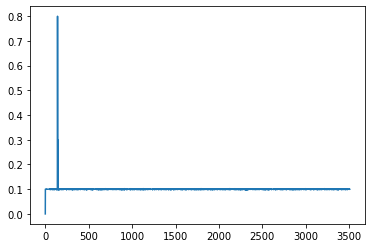

In [ ]:
df_dos_0A0['TimeWindow'].plot()
# 0으로 초기화 시켜주었기 떄문에 그래프 앞쪽이 0으로 그려짐.

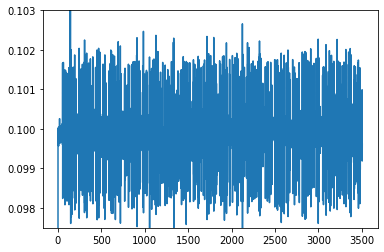

In [ ]:
df_dos_0A1['TimeWindow'].plot(ylim=(0.0975, 0.103))

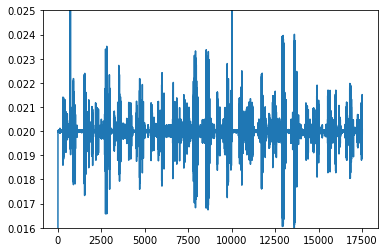

In [ ]:
df_dos_1F1['TimeWindow'].plot(ylim=(0.016, 0.025))

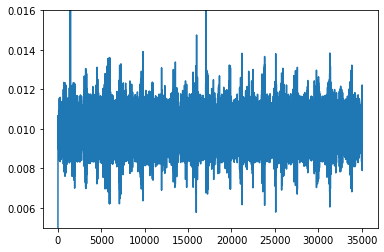

In [ ]:
df_dos_2A0['TimeWindow'].plot(ylim=(0.005, 0.016))

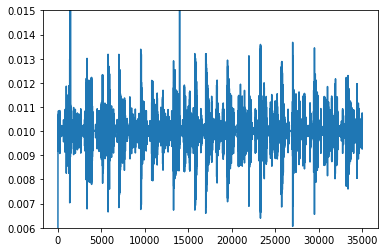

In [ ]:
df_dos_2B0['TimeWindow'].plot(ylim=(0.006, 0.015))

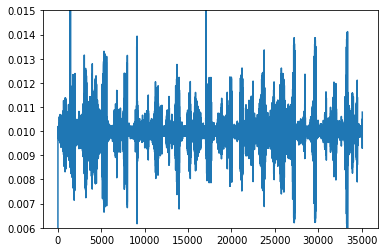

In [ ]:
df_dos_2C0['TimeWindow'].plot(ylim=(0.006, 0.015))

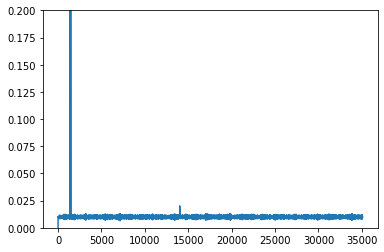

In [ ]:
df_dos_18F['TimeWindow'].plot(ylim=(0.0, 0.2))

In [ ]:
df_dos_Time.loc[0, 'TimeWindow'] = None
df_dos_Time.loc[0, 'TimeStack'] = None

## IVN_DoS 기초 통계

In [ ]:
import numpy as np
TW = df_dos_Time['TimeWindow']
print(f'평균값: {np.mean(TW)}')
print(f'최댓값: {np.max(TW)}')
print(f'최솟값: {np.min(TW)}')

TW_sorted = df_dos_Time['TimeWindow'].sort_values()
print(f'중간값: {TW_sorted[len(TW_sorted)//2]}')
print(f'분산: {np.var(TW)}')
print(f'표준편차: {np.std(TW)}')

평균값: 0.002132096580137432
최댓값: 0.6583089828491211
최솟값: 9.202957153320312e-05
중간값: 0.0043590068817138
분산: 6.686798358581775e-06
표준편차: 0.002585884444166401


# IVN_Free 분석

In [ ]:
# 0A0
df_free_0A0 = df_free.loc[df_free['CAN_ID']=='0A0']
df_free_0A0 = df_free_0A0.drop('index', axis=1)
df_free_0A0 = df_free_0A0.reset_index()
df_free_0A0

df_free_0A0.loc[0, 'TimeWindow'] = 0
df_free_0A0.loc[0, 'TimeStack'] = 0
df_free_0A0 = setTime(df_free_0A0)

# 0A1
df_free_0A1 = df_free.loc[df_free['CAN_ID']=='0A1']
df_free_0A1 = df_free_0A1.drop('index', axis=1)
df_free_0A1 = df_free_0A1.reset_index()
df_free_0A1

df_free_0A1.loc[0, 'TimeWindow'] = 0
df_free_0A1.loc[0, 'TimeStack'] = 0
df_free_0A1 = setTime(df_free_0A1)

#18F
df_free_18F = df_free.loc[df_free['CAN_ID']=='18F']
df_free_18F = df_free_18F.drop('index', axis=1)
df_free_18F = df_free_18F.reset_index()
df_free_18F

df_free_18F.loc[0, 'TimeWindow'] = 0
df_free_18F.loc[0, 'TimeStack'] = 0
df_free_18F = setTime(df_free_18F)

#1F1
df_free_1F1 = df_free.loc[df_free['CAN_ID']=='1F1']
df_free_1F1 = df_free_1F1.drop('index', axis=1)
df_free_1F1 = df_free_1F1.reset_index()
df_free_1F1

df_free_1F1.loc[0, 'TimeWindow'] = 0
df_free_1F1.loc[0, 'TimeStack'] = 0
df_free_1F1 = setTime(df_free_1F1)

#2A0
df_free_2A0 = df_free.loc[df_free['CAN_ID']=='2A0']
df_free_2A0 = df_free_2A0.drop('index', axis=1)
df_free_2A0 = df_free_2A0.reset_index()
df_free_2A0

df_free_2A0.loc[0, 'TimeWindow'] = 0
df_free_2A0.loc[0, 'TimeStack'] = 0
df_free_2A0 = setTime(df_free_2A0)

#2B0
df_free_2B0 = df_free.loc[df_free['CAN_ID']=='2B0']
df_free_2B0 = df_free_2B0.drop('index', axis=1)
df_free_2B0 = df_free_2B0.reset_index()
df_free_2B0

df_free_2B0.loc[0, 'TimeWindow'] = 0
df_free_2B0.loc[0, 'TimeStack'] = 0
df_free_2B0 = setTime(df_free_2B0)

#2C0
df_free_2C0 = df_free.loc[df_free['CAN_ID']=='2C0']
df_free_2C0 = df_free_2C0.drop('index', axis=1)
df_free_2C0 = df_free_2C0.reset_index()
df_free_2C0

df_free_2C0.loc[0, 'TimeWindow'] = 0
df_free_2C0.loc[0, 'TimeStack'] = 0
df_free_2C0 = setTime(df_free_2C0)


  0%|          | 0/4669 [00:00<?, ?it/s]

  0%|          | 0/4669 [00:00<?, ?it/s]

  0%|          | 0/46700 [00:00<?, ?it/s]

  0%|          | 0/23332 [00:00<?, ?it/s]

  0%|          | 0/46700 [00:00<?, ?it/s]

  0%|          | 0/46625 [00:00<?, ?it/s]

  0%|          | 0/46701 [00:00<?, ?it/s]

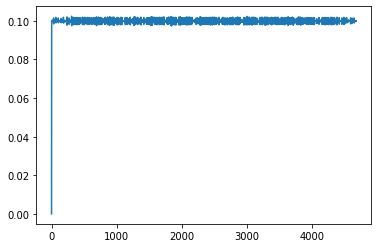

In [ ]:
df_free_0A0['TimeWindow'].plot()

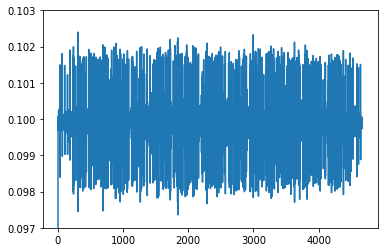

In [ ]:
df_free_0A1['TimeWindow'].plot(ylim=(0.097, 0.103))

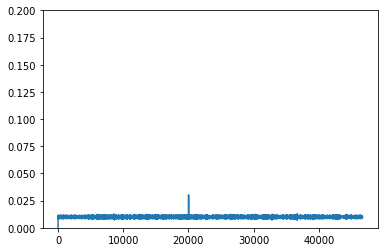

In [ ]:
df_free_18F['TimeWindow'].plot(ylim=(0.0, 0.2))

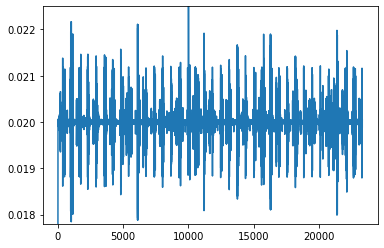

In [ ]:
df_free_1F1['TimeWindow'].plot(ylim=(0.0178, 0.0225))

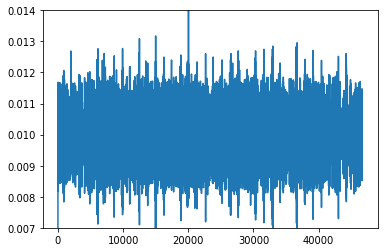

In [ ]:
df_free_2A0['TimeWindow'].plot(ylim=(0.007, 0.014))

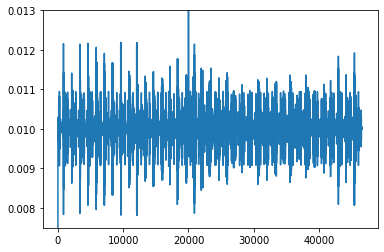

In [ ]:
df_free_2B0['TimeWindow'].plot(ylim=(0.0075, 0.013))

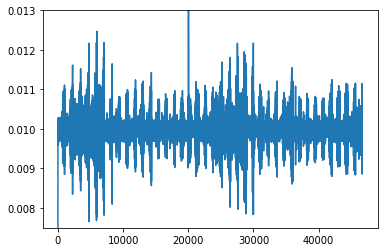

In [ ]:
df_free_2C0['TimeWindow'].plot(ylim=(0.0075, 0.013))

In [ ]:
df_free.loc[0, 'TimeWindow'] = None
df_free.loc[0, 'TimeStack'] = None

# IVN_Free 기초 통계

In [ ]:
import numpy as np
TW = df_free_Time['TimeWindow']
print(f'평균값: {np.mean(TW)}')
print(f'최댓값: {np.max(TW)}')
print(f'최솟값: {np.min(TW)}')

TW_sorted = df_free_Time['TimeWindow'].sort_values()
print(f'중간값: {TW_sorted[len(TW_sorted)//2]}')
print(f'분산: {np.var(TW)}')
print(f'표준편차: {np.std(TW)}')

평균값: 0.002126842654746765
최댓값: 0.0297780036926269
최솟값: 0.0
중간값: 0.0004699230194091
분산: 3.92316199830501e-06
표준편차: 0.0019806973515166344


In [ ]:
import numpy as np
TW = df_free_0A0['TimeWindow']
print(f'평균값: {np.mean(TW)}')
print(f'최댓값: {np.max(TW)}')
print(f'최솟값: {np.min(TW)}')

TW_sorted = df_free_0A0['TimeWindow'].sort_values()
print(f'중간값: {TW_sorted[len(TW_sorted)//2]}')
print(f'분산: {np.var(TW)}')
print(f'표준편차: {np.std(TW)}')

평균값: 0.09989443274585798
최댓값: 0.10239386558532715
최솟값: 0
중간값: 0.10036611557006836
분산: 2.653656268059912e-06
표준편차: 0.0016290046863222684


# IVN_Fuzzy 분석

In [ ]:
# 0A0
df_fuzzy_0A0 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='0A0']
df_fuzzy_0A0 = df_fuzzy_0A0.drop('index', axis=1)
df_fuzzy_0A0 = df_fuzzy_0A0.reset_index()
df_fuzzy_0A0

df_fuzzy_0A0.loc[0, 'TimeWindow'] = 0
df_fuzzy_0A0.loc[0, 'TimeStack'] = 0
df_fuzzy_0A0 = setTime(df_fuzzy_0A0)

# 0A1
df_fuzzy_0A1 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='0A1']
df_fuzzy_0A1 = df_fuzzy_0A1.drop('index', axis=1)
df_fuzzy_0A1 = df_fuzzy_0A1.reset_index()
df_fuzzy_0A1

df_fuzzy_0A1.loc[0, 'TimeWindow'] = 0
df_fuzzy_0A1.loc[0, 'TimeStack'] = 0
df_fuzzy_0A1 = setTime(df_fuzzy_0A1)

#18F
df_fuzzy_18F = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='18F']
df_fuzzy_18F = df_fuzzy_18F.drop('index', axis=1)
df_fuzzy_18F = df_fuzzy_18F.reset_index()
df_fuzzy_18F

df_fuzzy_18F.loc[0, 'TimeWindow'] = 0
df_fuzzy_18F.loc[0, 'TimeStack'] = 0
df_fuzzy_18F = setTime(df_fuzzy_18F)

#1F1
df_fuzzy_1F1 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='1F1']
df_fuzzy_1F1 = df_fuzzy_1F1.drop('index', axis=1)
df_fuzzy_1F1 = df_fuzzy_1F1.reset_index()
df_fuzzy_1F1

df_fuzzy_1F1.loc[0, 'TimeWindow'] = 0
df_fuzzy_1F1.loc[0, 'TimeStack'] = 0
df_fuzzy_1F1 = setTime(df_fuzzy_1F1)

#2A0
df_fuzzy_2A0 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='2A0']
df_fuzzy_2A0 = df_fuzzy_2A0.drop('index', axis=1)
df_fuzzy_2A0 = df_fuzzy_2A0.reset_index()
df_fuzzy_2A0

df_fuzzy_2A0.loc[0, 'TimeWindow'] = 0
df_fuzzy_2A0.loc[0, 'TimeStack'] = 0
df_fuzzy_2A0 = setTime(df_fuzzy_2A0)

#2B0
df_fuzzy_2B0 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='2B0']
df_fuzzy_2B0 = df_fuzzy_2B0.drop('index', axis=1)
df_fuzzy_2B0 = df_fuzzy_2B0.reset_index()
df_fuzzy_2B0

df_fuzzy_2B0.loc[0, 'TimeWindow'] = 0
df_fuzzy_2B0.loc[0, 'TimeStack'] = 0
df_fuzzy_2B0 = setTime(df_fuzzy_2B0)

#2C0
df_fuzzy_2C0 = df_fuzzy_Time.loc[df_fuzzy_Time['CAN_ID']=='2C0']
df_fuzzy_2C0 = df_fuzzy_2C0.drop('index', axis=1)
df_fuzzy_2C0 = df_fuzzy_2C0.reset_index()
df_fuzzy_2C0

df_fuzzy_2C0.loc[0, 'TimeWindow'] = 0
df_fuzzy_2C0.loc[0, 'TimeStack'] = 0
df_fuzzy_2C0 = setTime(df_fuzzy_2C0)


  0%|          | 0/9415 [00:00<?, ?it/s]

  0%|          | 0/9470 [00:00<?, ?it/s]

  0%|          | 0/37722 [00:00<?, ?it/s]

  0%|          | 0/21687 [00:00<?, ?it/s]

  0%|          | 0/37499 [00:00<?, ?it/s]

  0%|          | 0/37516 [00:00<?, ?it/s]

  0%|          | 0/37455 [00:00<?, ?it/s]

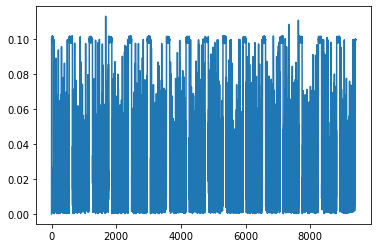

In [ ]:
df_fuzzy_0A0['TimeWindow'].plot() #점도표

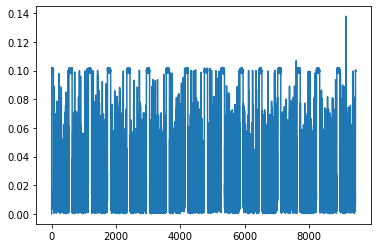

In [ ]:
df_fuzzy_0A1['TimeWindow'].plot()

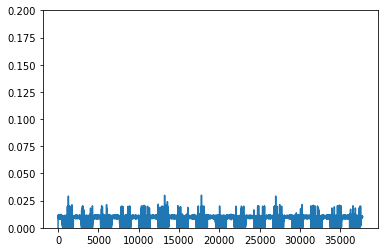

In [ ]:
df_fuzzy_18F['TimeWindow'].plot(ylim=(0.0, 0.2))

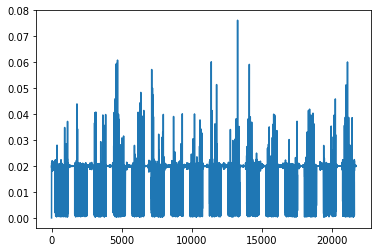

In [ ]:
df_fuzzy_1F1['TimeWindow'].plot()

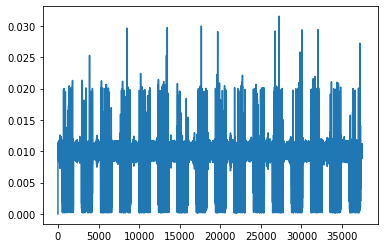

In [ ]:
df_fuzzy_2A0['TimeWindow'].plot()

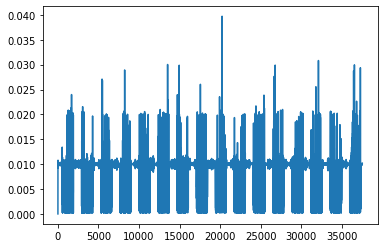

In [ ]:
df_fuzzy_2B0['TimeWindow'].plot()

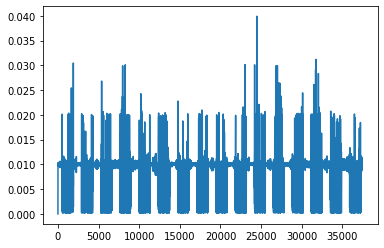

In [ ]:
df_fuzzy_2C0['TimeWindow'].plot()

In [ ]:
df_fuzzy_Time.loc[0, 'TimeWindow'] = None
df_fuzzy_Time.loc[0, 'TimeStack'] = None

# IVN_Fuzzy 기초 통계

In [ ]:
import numpy as np
TW = df_fuzzy_Time['TimeWindow']
print(f'평균값: {np.mean(TW)}')
print(f'최댓값: {np.max(TW)}')
print(f'최솟값: {np.min(TW)}')

TW_sorted = df_fuzzy_Time['TimeWindow'].sort_values()
print(f'중간값: {TW_sorted[len(TW_sorted)//2]}')
print(f'분산: {np.var(TW)}')
print(f'표준편차: {np.std(TW)}')

평균값: 0.0016650100908370414
최댓값: 0.0139951705932617
최솟값: 4.601478576660156e-05
중간값: 0.0023589134216308
분산: 2.7514121123558817e-06
표준편차: 0.0016587381084293812


# IVN_MalFunction 분석

In [ ]:
# 0A0
df_mal_0A0 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='0A0']
df_mal_0A0 = df_mal_0A0.drop('index', axis=1)
df_mal_0A0 = df_mal_0A0.reset_index()
df_mal_0A0

df_mal_0A0.loc[0, 'TimeWindow'] = 0
df_mal_0A0.loc[0, 'TimeStack'] = 0
df_mal_0A0 = setTime(df_mal_0A0)

# 0A1
df_mal_0A1 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='0A1']
df_mal_0A1 = df_mal_0A1.drop('index', axis=1)
df_mal_0A1 = df_mal_0A1.reset_index()
df_mal_0A1

df_mal_0A1.loc[0, 'TimeWindow'] = 0
df_mal_0A1.loc[0, 'TimeStack'] = 0
df_mal_0A1 = setTime(df_mal_0A1)

#18F
df_mal_18F = df_mal_Time.loc[df_mal_Time['CAN_ID']=='18F']
df_mal_18F = df_mal_18F.drop('index', axis=1)
df_mal_18F = df_mal_18F.reset_index()
df_mal_18F

df_mal_18F.loc[0, 'TimeWindow'] = 0
df_mal_18F.loc[0, 'TimeStack'] = 0
df_mal_18F = setTime(df_mal_18F)

#1F1
df_mal_1F1 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='1F1']
df_mal_1F1 = df_mal_1F1.drop('index', axis=1)
df_mal_1F1 = df_mal_1F1.reset_index()
df_mal_1F1

df_mal_1F1.loc[0, 'TimeWindow'] = 0
df_mal_1F1.loc[0, 'TimeStack'] = 0
df_mal_1F1 = setTime(df_mal_1F1)

#2A0
df_mal_2A0 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='2A0']
df_mal_2A0 = df_mal_2A0.drop('index', axis=1)
df_mal_2A0 = df_mal_2A0.reset_index()
df_mal_2A0

df_mal_2A0.loc[0, 'TimeWindow'] = 0
df_mal_2A0.loc[0, 'TimeStack'] = 0
df_mal_2A0 = setTime(df_mal_2A0)

#2B0
df_mal_2B0 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='2B0']
df_mal_2B0 = df_mal_2B0.drop('index', axis=1)
df_mal_2B0 = df_mal_2B0.reset_index()
df_mal_2B0

df_mal_2B0.loc[0, 'TimeWindow'] = 0
df_mal_2B0.loc[0, 'TimeStack'] = 0
df_mal_2B0 = setTime(df_mal_2B0)

#2C0
df_mal_2C0 = df_mal_Time.loc[df_mal_Time['CAN_ID']=='2C0']
df_mal_2C0 = df_mal_2C0.drop('index', axis=1)
df_mal_2C0 = df_mal_2C0.reset_index()
df_mal_2C0

df_mal_2C0.loc[0, 'TimeWindow'] = 0
df_mal_2C0.loc[0, 'TimeStack'] = 0
df_mal_2C0 = setTime(df_mal_2C0)


  0%|          | 0/3112 [00:00<?, ?it/s]

  0%|          | 0/3112 [00:00<?, ?it/s]

  0%|          | 0/31110 [00:00<?, ?it/s]

  0%|          | 0/15519 [00:00<?, ?it/s]

  0%|          | 0/31109 [00:00<?, ?it/s]

  0%|          | 0/31035 [00:00<?, ?it/s]

  0%|          | 0/31098 [00:00<?, ?it/s]

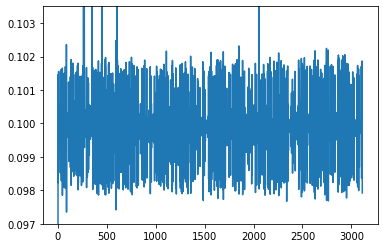

In [ ]:
df_mal_0A0['TimeWindow'].plot(ylim=(0.097, 0.1035))

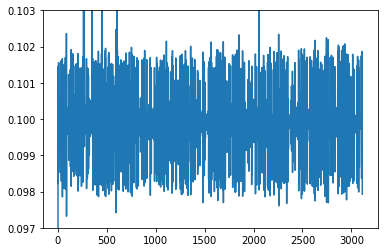

In [ ]:
df_mal_0A1['TimeWindow'].plot(ylim=(0.097, 0.103))

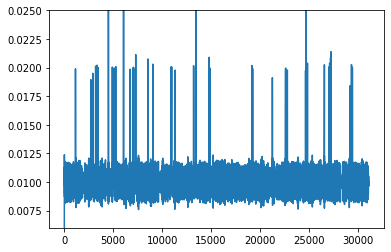

In [ ]:
df_mal_18F['TimeWindow'].plot(ylim=(0.006, 0.025))

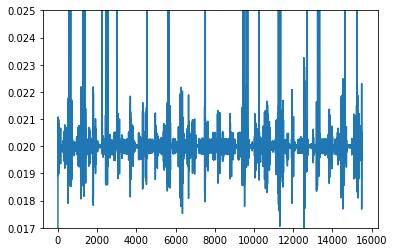

In [ ]:
df_mal_1F1['TimeWindow'].plot(ylim=(0.017, 0.025))

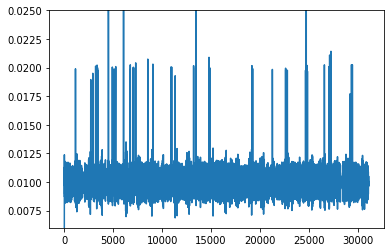

In [ ]:
df_mal_2A0['TimeWindow'].plot(ylim=(0.006, 0.025))

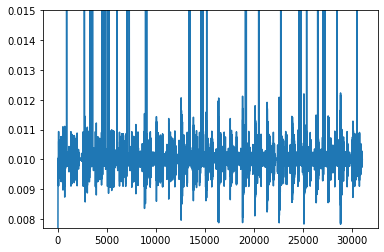

In [ ]:
df_mal_2B0['TimeWindow'].plot(ylim=(0.0077, 0.015))

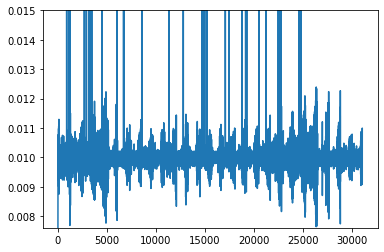

In [ ]:
df_mal_2C0['TimeWindow'].plot(ylim=(0.0076, 0.015))

In [ ]:
df_mal_Time.loc[0, 'TimeWindow'] = None
df_mal_Time.loc[0, 'TimeStack'] = None

# IVN_MalFunction 기초 통계

In [ ]:
import numpy as np
TW = df_mal_Time['TimeWindow']
print(f'평균값: {np.mean(TW)}')
print(f'최댓값: {np.max(TW)}')
print(f'최솟값: {np.min(TW)}')

TW_sorted = df_mal_Time['TimeWindow'].sort_values()
print(f'중간값: {TW_sorted[len(TW_sorted)//2]}')
print(f'분산: {np.var(TW)}')
print(f'표준편차: {np.std(TW)}')

평균값: 0.00213429375615719
최댓값: 0.2691361904144287
최솟값: 3.0994415283203125e-05
중간값: 0.0004680156707763
분산: 4.7138388882935775e-06
표준편차: 0.00217113769445735
